In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [105]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", None)

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [122]:
sns.set(rc={'figure.figsize':(16,12)})

In [59]:
data = pd.read_csv('cleaned_taxi_data.csv')

In [5]:
# data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format='%Y/%m/%d %H:%M:%S')
# data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format='%Y/%m/%d %H:%M:%S')

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [60]:
data = data.drop(['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'fare_amount','extra','mta_tax',
                 'tip_amount','tolls_amount','improvement_surcharge','payment_type','tmin','tmax'], axis=1)

In [111]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,congestion_surcharge,date,day,weekday,hour,tavg,prcp,snow,trip_duration_seconds
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.00,1.20,238,239,11.27,2.50,2020-01-01 00:00:00,1,2,0,3.60,0.00,0,288.00
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.00,1.20,239,238,12.30,2.50,2020-01-01 00:00:00,1,2,0,3.60,0.00,0,445.00
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.00,0.60,238,238,10.80,2.50,2020-01-01 00:00:00,1,2,0,3.60,0.00,0,371.00
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.00,0.80,238,151,8.16,0.00,2020-01-01 00:00:00,1,2,0,3.60,0.00,0,291.00
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.00,0.00,193,193,4.80,0.00,2020-01-01 00:00:00,1,2,0,3.60,0.00,0,138.00


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6339346 entries, 0 to 6339345
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   passenger_count        float64
 3   trip_distance          float64
 4   PULocationID           int64  
 5   DOLocationID           int64  
 6   total_amount           float64
 7   congestion_surcharge   float64
 8   date                   object 
 9   day                    int64  
 10  weekday                int64  
 11  hour                   int64  
 12  tavg                   float64
 13  prcp                   float64
 14  snow                   int64  
 15  trip_duration_seconds  float64
dtypes: float64(7), int64(6), object(3)
memory usage: 773.8+ MB


In [113]:
sample = data.sample(100000)

In [114]:
sample = sample.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'date'],axis=1)

In [115]:
sample.shape

(100000, 13)

## Train and Test split data

In [116]:
# X = data.drop('trip_duration_seconds', axis=1).values
# y = data['trip_duration_seconds'].values

X = sample.drop('trip_duration_seconds', axis=1).values
y = sample['trip_duration_seconds'].values

In [72]:
# sample.info()

In [117]:
print(X.shape)
print(y.shape)

(100000, 12)
(100000,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
X_train=np.asarray(X_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)

In [120]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 12)
(20000, 12)
(80000,)
(20000,)


### Multi layer Perceptron

In [121]:
learning_rates = [1E-0, 1E-1,1E-2, 1E-3, 1E-4, 1E-5]

#### Multi layer perceptron model

In [123]:
def fit_mlp(X_train, y_train, X_test, y_test, lrate, loss, optmzr):
    
    # Step 1: define model
    model = Sequential()
    model.add(Dense(100, input_dim=12, activation='relu', name='layer1'))
    model.add(Dense(75, activation='relu', name='layer2'))
    model.add(Dense(1, activation='relu', name='layer3'))
    
    # Step 2: compile model
    opt = SGD(learning_rate=lrate)
    model.compile(loss=loss, optimizer=optmzr, metrics=['accuracy'])
    model.summary()
    
    # Step 3: fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
   
    # Setp 4: plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('lrate='+str(lrate), pad=-50)

#### Loss = 'mean square error' | optimiser = SGD

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 76        
Total params: 8,951
Trainable params: 8,951
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
____________________________

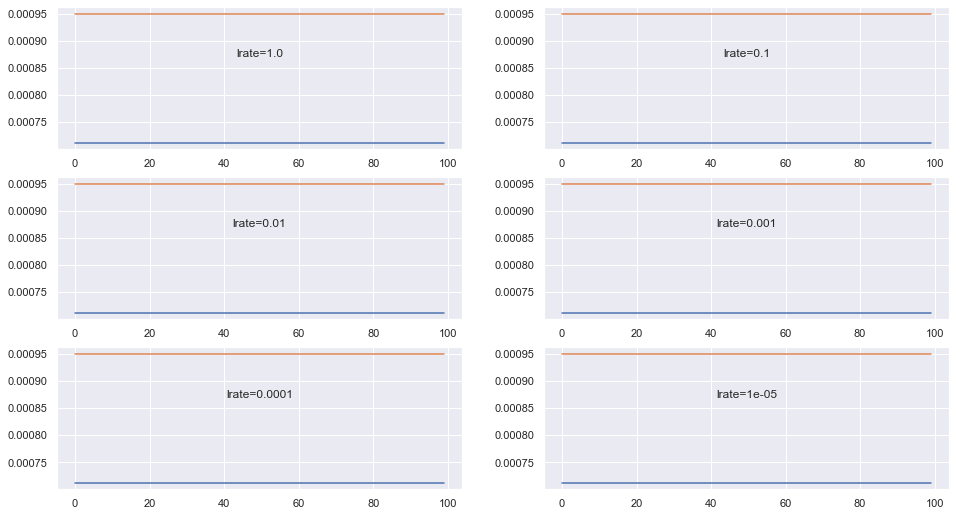

In [124]:
for i in range(len(learning_rates)):
    opt = SGD(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_squared_error'
    fit_mlp(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()

#### Loss = 'mean_absolute_error' | optimiser = SGD

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 76        
Total params: 8,951
Trainable params: 8,951
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
____________________________

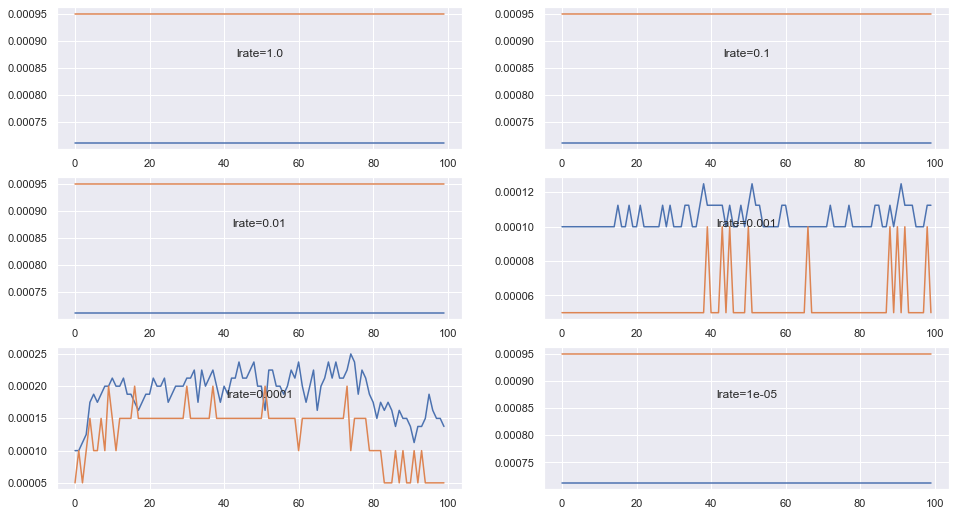

In [125]:
for i in range(len(learning_rates)):
    opt = SGD(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_absolute_error'
    fit_mlp(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()

#### Loss = 'mean_squared_error' | optimiser = Adam

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 76        
Total params: 8,951
Trainable params: 8,951
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
____________________________

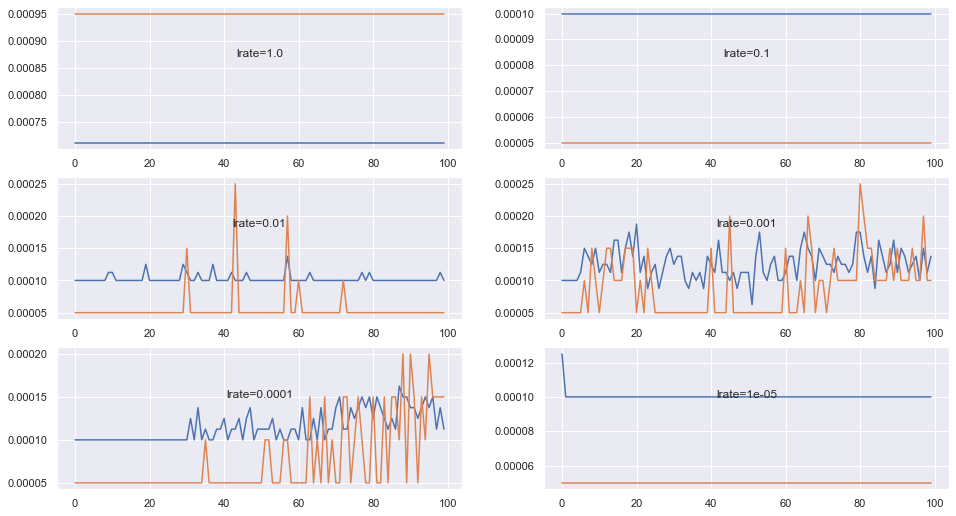

In [126]:
for i in range(len(learning_rates)):
    opt = Adam(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_squared_error'
    fit_mlp(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()

#### Loss = 'mean_absolute_error' | optimiser = Adam

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 76        
Total params: 8,951
Trainable params: 8,951
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
____________________________

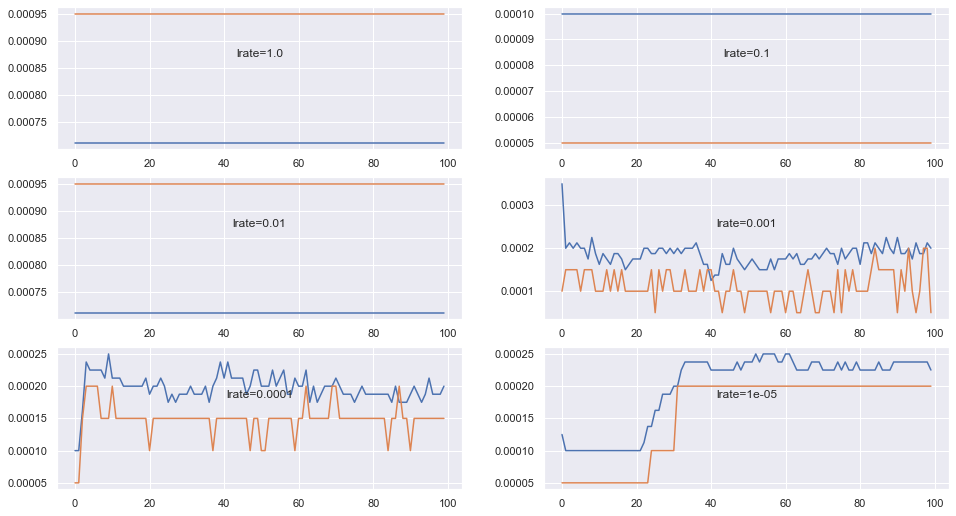

In [127]:
for i in range(len(learning_rates)):
    opt = Adam(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_absolute_error'
    fit_mlp(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()

#### Loss = 'mean_squared_error' | optimiser = RMSprop

In [129]:
learning_rates = [1E-3, 1E-4, 1E-5, 1E-6, 1E-7, 1E-8,]

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 76        
Total params: 8,951
Trainable params: 8,951
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
____________________________

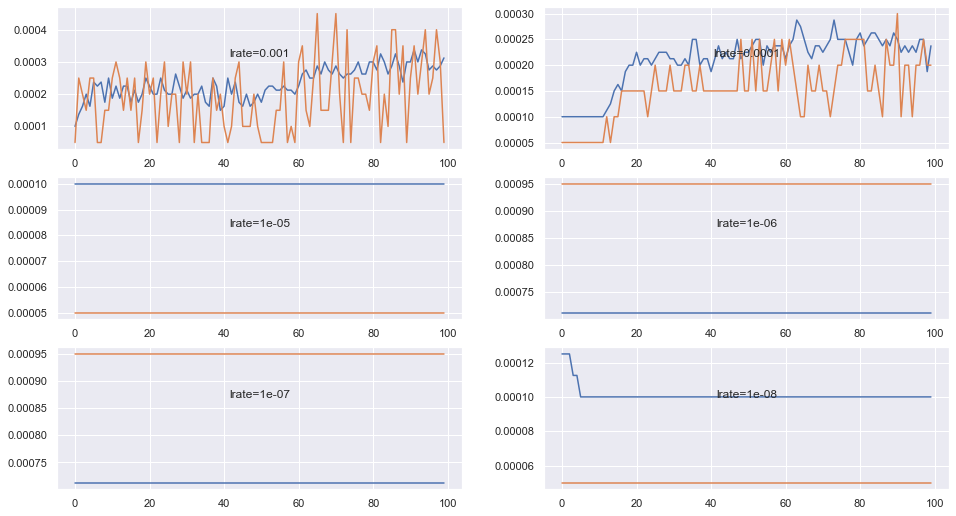

In [130]:
for i in range(len(learning_rates)):
    opt = RMSprop(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_squared_error'
    fit_mlp(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()

#### Loss = 'mean_absolute_error' | optimiser = RMSprop

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 76        
Total params: 8,951
Trainable params: 8,951
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               1300      
_________________________________________________________________
layer2 (Dense)               (None, 75)                7575      
____________________________

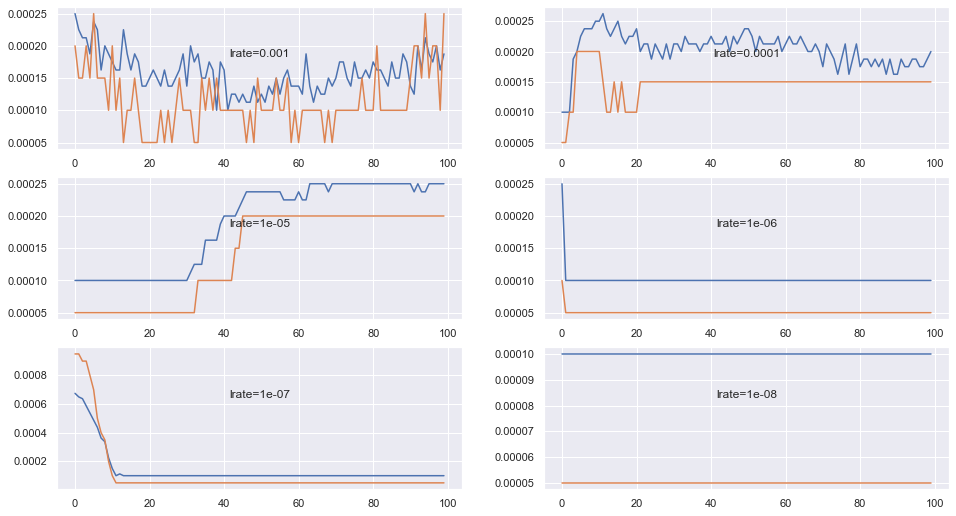

In [131]:
for i in range(len(learning_rates)):
    opt = RMSprop(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_absolute_error'
    fit_mlp(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()